# Text Preprocessing

This notebook demonstrates various text preprocessing techniques using the NLTK library.

In [ ]:
ROOT = "/content/drive/MyDrive/DAM202" # Your Working Directory
import os
os.chdir(ROOT)

The following cell sets the root directory for the project. This is the directory where the notebook will look for files.

### Contraction Expansion
Contractions are shortened versions of words or syllables. In text processing, it's often useful to expand them to their original form. For example, "can't" becomes "cannot".

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This cell defines a function to expand contractions (e.g., "can't" to "cannot") and applies it to the text.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This cell prints the original text and the text with contractions expanded to show the difference.

In [ ]:
#import os
os.listdir()

['text.txt',
 'improved_word2vec_model.model',
 'my_word2vec_model.model',
 'Practical2.ipynb']

This cell uses the `difflib` library to highlight the differences between the original and expanded text.

### Tokenization
Tokenization is the process of breaking down a text into smaller units, such as words or sentences.

In [ ]:
with open('text.txt', 'r', encoding='utf-8') as f: # Remember your data set path should be specified if not in same working directory
    texts = f.readlines()

This cell reads the content of the `text.txt` file.

Word tokenization splits the text into individual words.

In [ ]:
texts[:10]

["                ALICE'S ADVENTURES IN WONDERLAND\n",
 '\n',
 '                          Lewis Carroll\n',
 '\n',
 '               THE MILLENNIUM FULCRUM EDITION 3.0\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '                            CHAPTER I\n']

This cell performs word tokenization on the text.

In [ ]:
# Add this right after your data loading section
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg

# Get texts from other classic books
gutenberg_texts = []
for fileid in gutenberg.fileids()[:5]:  # First 5 books
    text = ' '.join(gutenberg.words(fileid))
    gutenberg_texts.extend([text])  # Add as individual documents

# Combine with your Alice text
all_texts = texts + gutenberg_texts
print(f"Enhanced corpus: {len(all_texts)} documents")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Enhanced corpus: 3603 documents


This cell performs sentence tokenization on the text.

Sentence tokenization splits the text into individual sentences.

In [ ]:
import gensim.downloader as api

# Load a standard, pre-tokenized corpus (text8 is ~100MB of Wikipedia text)
# This will download the data the first time you run it (it might take a minute).
print("Loading text8 corpus...")
corpus = api.load('text8')
print("Corpus loaded.")

Loading text8 corpus...
Corpus loaded.


This cell also performs sentence tokenization and prints the resulting sentences.

### Lowercasing
Lowercasing all text is a common preprocessing step. It helps in treating words like "The" and "the" as the same word.

In [ ]:
def assess_data_quality(texts):
    """Analyze text data quality for Word2Vec training"""

    stats = {
        'total_documents': len(texts),
        'total_words': 0,
        'unique_words': set(),
        'sentence_lengths': [],
        'word_frequencies': {}
    }

    for text in texts:
        words = text.lower().split()
        stats['total_words'] += len(words)
        stats['sentence_lengths'].append(len(words))
        stats['unique_words'].update(words)

        for word in words:
            stats['word_frequencies'][word] = stats['word_frequencies'].get(word, 0) + 1

    stats['vocabulary_size'] = len(stats['unique_words'])
    stats['avg_sentence_length'] = sum(stats['sentence_lengths']) / len(stats['sentence_lengths'])

    # Find most common words
    sorted_words = sorted(stats['word_frequencies'].items(), key=lambda x: x[1], reverse=True)
    stats['top_words'] = sorted_words[:20]

    # Quality indicators
    stats['quality_score'] = {
        'vocabulary_diversity': stats['vocabulary_size'] / stats['total_words'],
        'avg_word_frequency': stats['total_words'] / stats['vocabulary_size'],
        'rare_words_ratio': sum(1 for count in stats['word_frequencies'].values() if count == 1) / stats['vocabulary_size']
    }

    return stats

# Example usage
quality_report = assess_data_quality(texts)
print(f"Total documents: {quality_report['total_documents']:,}")
print(f"Vocabulary size: {quality_report['vocabulary_size']:,}")
print(f"Unique Words: {quality_report['unique_words']}")
print(f"Average sentence length: {quality_report['avg_sentence_length']:.1f}")
print(f"Vocabulary diversity: {quality_report['quality_score']['vocabulary_diversity']:.4f}")

Total documents: 3,598
Vocabulary size: 4,950
Unique Words: {"growling,'", 'child', 'done.', 'difficulties,', 'imagine', 'life,', 'denied', "mad.'", 'arm-chair', 'patiently.', '`my', 'sooner', 'listened,', '`chorus', 'majesty', 'chanced', "here!'", "alive!'", 'attending', 'time', 'soldier', 'tea-tray', 'oblong', 'saw.', 'minutes', 'prize', "court.'", 'heap', 'chorus.', 'little.', "`--where's", 'hold', "is!'", 'trot', 'schoolroom,', 'kettle', 'business', "lobster--'", 'pet:', 'ground', 'hour', 'breath,', "say!'", 'lory,', 'grin,', 'panther', 'brass', "i've", "william,'", 'merrily', 'felt', 'me!', '`--likely', 'heads.', 'other.', 'rome,', 'entrance', "words,'", "this?'", "altered.'", 'timid', 'fluttered', 'earnestly,', 'flamingoes,', 'crocodile', 'dears', "were',", "cards!'", 'insolence', 'else"--but,', 'like', 'coming', "grunt,'", 'saucepan', "then!'", 'soldiers', "crumbs.'", 'telescope!', '`that', "home,'", 'it;', 'so,', 'seriously,', '`tell', 'fighting', 'lost', 'dismay,', 'dozing', "

This cell converts the text to lowercase.

### Stopword Removal
Stopwords are common words (like "a", "the", "is") that are often removed from text because they don't carry significant meaning.

In [ ]:
# #Import Packages
# import re
# import string
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize, sent_tokenize
# from nltk.stem import WordNetLemmatizer
# from nltk.tag import pos_tag
# import nltk

This cell defines a list of English stopwords.

In [ ]:
# # Download required NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt_tab')
# nltk.download('gutenberg')

This cell removes the stopwords from the tokenized text.

In [ ]:
class AdvancedTextPreprocessor:
    """Comprehensive text preprocessing for Word2Vec training"""

    def __init__(self,
                 lowercase=True,
                 remove_punctuation=True,
                 remove_numbers=False,
                 remove_stopwords=False,
                 min_word_length=2,
                 max_word_length=50,
                 lemmatize=False,
                 remove_urls=True,
                 remove_emails=True,
                 keep_sentences=True):

        self.lowercase = lowercase
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.remove_stopwords = remove_stopwords
        self.min_word_length = min_word_length
        self.max_word_length = max_word_length
        self.lemmatize = lemmatize
        self.remove_urls = remove_urls
        self.remove_emails = remove_emails
        self.keep_sentences = keep_sentences

        if remove_stopwords:
            self.stop_words = set(stopwords.words('english'))

        if lemmatize:
            self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        """Clean individual text string"""

        # Remove URLs
        if self.remove_urls:
            text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove email addresses
        if self.remove_emails:
            text = re.sub(r'\S+@\S+', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        #Combined
         #(r'https?://\S+|www\.\S+|<.*?>|\S+@\S+\.\S+|@\w+|#\w+|[^A-Za-z0-9\s])

        return text

    def tokenize_text(self, text):
        """Tokenize text into sentences or words"""

        if self.keep_sentences:
            # Tokenize into sentences first
            sentences = sent_tokenize(text)
            processed_sentences = []

            for sentence in sentences:
                words = self.process_sentence(sentence)
                if len(words) >= 3:  # Keep sentences with at least 3 words
                    processed_sentences.append(words)

            return processed_sentences
        else:
            # Return single list of words
            return self.process_sentence(text)

    def process_sentence(self, sentence):
        """Process individual sentence"""

        # Lowercase
        if self.lowercase:
            sentence = sentence.lower()

        # Tokenize into words
        words = word_tokenize(sentence)

        processed_words = []
        for word in words:

            # Remove punctuation
            if self.remove_punctuation:
                word = word.translate(str.maketrans('', '', string.punctuation))

            # Skip if empty after punctuation removal
            if not word:
                continue

            # Remove numbers
            if self.remove_numbers and word.isdigit():
                continue

            # Check word length
            if len(word) < self.min_word_length or len(word) > self.max_word_length:
                continue

            # Remove stopwords
            if self.remove_stopwords and word in self.stop_words:
                continue

            # Lemmatize
            if self.lemmatize:
                word = self.lemmatizer.lemmatize(word)

            processed_words.append(word)

        return processed_words

    def preprocess_corpus(self, texts):
        """Preprocess entire corpus"""

        all_sentences = []

        for text in texts:
            if not isinstance(text, str):
                continue

            # Clean text
            cleaned_text = self.clean_text(text)

            # Tokenize and process
            processed = self.tokenize_text(cleaned_text)

            if self.keep_sentences:
                all_sentences.extend(processed)
            else:
                all_sentences.append(processed)

        return all_sentences

This cell defines a class for advanced text preprocessing, including a method to remove stopwords.

This function takes a list of words and removes any stopwords.

In [ ]:
# Example usage - MODIFIED PARAMETERS
preprocessor = AdvancedTextPreprocessor(
    lowercase=True,
    remove_punctuation=True,  # Changed: Keep punctuation for better context
    remove_numbers=True,
    remove_stopwords=True,  # Changed: Keep stopwords initially
    lemmatize=True,
    min_word_length=3,  # Changed: Lower min word length
    max_word_length=30,
    keep_sentences=True,
    remove_urls=True,
    remove_emails=True
)

# Processing corpus
processed_sentences = preprocessor.preprocess_corpus(all_texts)
print(f"Now processing {len(processed_sentences)} sentences!")
print(f"Sample sentence: {processed_sentences[0]}")

Now processing 46268 sentences!
Sample sentence: ['alice', 'adventure', 'wonderland']


This cell creates an instance of the `AdvancedTextPreprocessor` and uses it to remove stopwords from the text.

In [ ]:
# Step 6: Check Data Quality
import numpy as np

# Let's see whats the processed sentences actually look like
print("Sample processed sentences:")
for i, sentence in enumerate(processed_sentences[:10]):
    print(f"{i+1}. {sentence}")
    if i >= 4:  # Just show first 5
        break

# Check sentence lengths
sentence_lengths = [len(sentence) for sentence in processed_sentences]
print(f"\nAverage sentence length: {np.mean(sentence_lengths):.1f} words")
print(f"Shortest sentence: {min(sentence_lengths)} words")
print(f"Longest sentence: {max(sentence_lengths)} words")

Sample processed sentences:
1. ['alice', 'adventure', 'wonderland']
2. ['millennium', 'fulcrum', 'edition']
3. ['alice', 'beginning', 'get', 'tired', 'sitting', 'sister']
4. ['bank', 'nothing', 'twice']
5. ['peeped', 'book', 'sister', 'reading']

Average sentence length: 11.6 words
Shortest sentence: 3 words
Longest sentence: 193 words


This cell performs lemmatization on the text.

In [ ]:
processed_sentences[:3]

[['alice', 'adventure', 'wonderland'],
 ['millennium', 'fulcrum', 'edition'],
 ['alice', 'beginning', 'get', 'tired', 'sitting', 'sister']]

This cell shows the difference between the original text and the lemmatized text.

### Lemmatization
Lemmatization is the process of reducing a word to its base or dictionary form, known as the lemma. For example, the lemma of "running", "runs", and "ran" is "run".

In [ ]:
def recommend_parameters(corpus_size, vocab_size, domain_type, computing_resources):
    """
    Recommend Word2Vec parameters based on corpus characteristics

    Args:
        corpus_size: Number of sentences/documents
        vocab_size: Unique words in vocabulary
        domain_type: 'general', 'technical', 'social_media', 'academic'
        computing_resources: 'limited', 'moderate', 'high'
    """

    recommendations = {}

    # Vector size based on corpus and vocab size
    if corpus_size < 10000:
        recommendations['vector_size'] = 50
    elif corpus_size < 100000:
        recommendations['vector_size'] = 100
    elif corpus_size < 1000000:
        recommendations['vector_size'] = 200
    else:
        recommendations['vector_size'] = 300

    # Window size based on domain
    domain_windows = {
        'general': 5,
        'technical': 3,  # More syntactic focus
        'social_media': 4,
        'academic': 6    # More semantic focus
    }
    recommendations['window'] = domain_windows.get(domain_type, 5)

    # Min count based on corpus size
    if corpus_size < 10000:
        recommendations['min_count'] = 1
    elif corpus_size < 100000:
        recommendations['min_count'] = 2
    elif corpus_size < 1000000:
        recommendations['min_count'] = 5
    else:
        recommendations['min_count'] = 10

    # Algorithm selection
    if domain_type in ['technical', 'academic']:
        recommendations['sg'] = 1  # Skip-gram for rare technical terms
    else:
        recommendations['sg'] = 0  # CBOW for general text

    # Epochs based on corpus size and resources
    if computing_resources == 'limited':
        recommendations['epochs'] = 5
    elif corpus_size < 100000:
        recommendations['epochs'] = 15
    else:
        recommendations['epochs'] = 10

    # Hierarchical softmax vs negative sampling
    if vocab_size > 100000:
        recommendations['hs'] = 1
        recommendations['negative'] = 0
    else:
        recommendations['hs'] = 0
        recommendations['negative'] = 10

    return recommendations

This cell also performs lemmatization on the text.

In [ ]:
corpus_size = len(processed_sentences)
print(f"Corpus Size: {corpus_size}")

# Calculate vocabulary size (unique words in vocabulary)
vocab = set(word for sentence in processed_sentences for word in sentence)
vocab_size = len(vocab)
print(f"Vocabulary Size: {vocab_size}")

Corpus Size: 46268
Vocabulary Size: 17268


This cell prints the lemmatized words.

In [ ]:
# For this task
params = recommend_parameters(
    corpus_size=corpus_size,
    vocab_size=vocab_size,
    domain_type='general',
    computing_resources='moderate'
)
print("Recommended parameters:", params)

Recommended parameters: {'vector_size': 100, 'window': 5, 'min_count': 2, 'sg': 0, 'epochs': 15, 'hs': 0, 'negative': 10}


This cell compares the original words with the lemmatized words.

### Stemming
Stemming is a process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

In [ ]:
pip install gensim

This cell installs the `gensim` library, which is used for topic modeling and other NLP tasks.

The Porter stemmer is one of the most popular stemming algorithms.

In [ ]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import time
import multiprocessing

class EpochLogger(CallbackAny2Vec):
    """Callback to log information about training progress"""

    def __init__(self):
        self.epoch = 0
        self.start_time = time.time()

    def on_epoch_begin(self, model):
        print(f"Epoch #{self.epoch} start")

    def on_epoch_end(self, model):
        elapsed = time.time() - self.start_time
        print(f"Epoch #{self.epoch} end - Time elapsed: {elapsed:.2f}s")
        self.epoch += 1

def train_word2vec_model(sentences, save_path=None, **params):
    """
    Train Word2Vec model with given parameters

    Args:
        sentences: List of tokenized sentences
        save_path: Path to save the model
        **params: Word2Vec parameters
    """

    # Set default parameters
    default_params = {
        'vector_size': 100,
        'window': 5,
        'min_count': 5,
        'workers': multiprocessing.cpu_count() - 1,
        'sg': 1,  # CBOW
        'epochs': 10,
        'alpha': 0.025,
        'min_alpha': 0.0001,
        'hs': 0,
        'negative': 10
    }

    # Update with provided parameters
    default_params.update(params)

    print("Training Word2Vec model with parameters:")
    for key, value in default_params.items():
        print(f"  {key}: {value}")

    # Add callback for progress monitoring
    epoch_logger = EpochLogger()

    # Train the model
    print(f"\nTraining on the streamed corpus...")
    start_time = time.time()

    model = Word2Vec(
        sentences=sentences,
        callbacks=[epoch_logger],
        **default_params
    )

    training_time = time.time() - start_time
    print(f"\nTraining completed in {training_time:.2f} seconds")
    print(f"Vocabulary size: {len(model.wv)} words")

    # Save model if path provided
    if save_path:
        model.save(save_path)
        print(f"Model saved to {save_path}")

    return model

This cell performs stemming on the text using the Porter Stemmer.

In [ ]:
# Example usage
model = train_word2vec_model(
    sentences=corpus,
    save_path='my_word2vec_model_text8.model',
    vector_size=200,
    window=10,
    min_count=10,
    negative=5,
    sg=1,
    epochs=3,
    compute_loss = True
)


Training Word2Vec model with parameters:
  vector_size: 200
  window: 10
  min_count: 10
  workers: 1
  sg: 1
  epochs: 3
  alpha: 0.025
  min_alpha: 0.0001
  hs: 0
  negative: 5
  compute_loss: True

Training on the streamed corpus...
Epoch #0 start
Epoch #0 end - Time elapsed: 355.27s
Epoch #1 start
Epoch #1 end - Time elapsed: 686.62s
Epoch #2 start
Epoch #2 end - Time elapsed: 1018.50s

Training completed in 1018.50 seconds
Vocabulary size: 47134 words
Model saved to my_word2vec_model_text8.model


This cell provides an example of how the Porter Stemmer works.

The Lancaster stemmer is more aggressive than the Porter stemmer.

In [192]:
# Train a CBOW model (sg=0)
model_cbow = train_word2vec_model(
    sentences=corpus,
    save_path='my_word2vec_model_text8_cbow.model',
    vector_size=200,
    window=10,
    min_count=10,
    negative=5,
    sg=0,  # CBOW
    epochs=3,
    compute_loss=True
)

Training Word2Vec model with parameters:
  vector_size: 200
  window: 10
  min_count: 10
  workers: 1
  sg: 0
  epochs: 3
  alpha: 0.025
  min_alpha: 0.0001
  hs: 0
  negative: 5
  compute_loss: True

Training on the streamed corpus...
Epoch #0 start
Epoch #0 end - Time elapsed: 67.02s
Epoch #1 start
Epoch #1 end - Time elapsed: 124.73s
Epoch #2 start
Epoch #2 end - Time elapsed: 182.39s

Training completed in 182.39 seconds
Vocabulary size: 47134 words
Model saved to my_word2vec_model_text8_cbow.model


This cell performs stemming on the text using the Lancaster Stemmer.

In [ ]:
vocab_size = len(model.wv.index_to_key)
print("Vocabulary Size:", vocab_size)

Vocabulary Size: 47134


This cell provides an example of how the Lancaster Stemmer works.

The Snowball stemmer is an improvement over the Porter stemmer and is also known as the Porter2 stemmer. It is more aggressive than the Porter stemmer.

In [ ]:
all_words = model.wv.index_to_key
print("All Words in Vocabulary:", all_words[:10])

All Words in Vocabulary: ['the', 'of', 'and', 'one', 'in', 'a', 'to', 'zero', 'nine', 'two']


This cell performs stemming on the text using the Snowball Stemmer.

### Part-of-Speech (POS) Tagging
Part-of-speech tagging is the process of marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [ ]:
import numpy as np
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity

class Word2VecEvaluator:
    """Comprehensive evaluation suite for Word2Vec models"""

    def __init__(self, model):
        self.model = model
        self.wv = model.wv

    def evaluate_word_similarity(self, word_pairs_with_scores):
        """
        Evaluate model on word similarity datasets

        Args:
            word_pairs_with_scores: List of tuples (word1, word2, human_score)

        Returns:
            Spearman correlation with human judgments
        """

        model_similarities = []
        human_similarities = []

        for word1, word2, human_score in word_pairs_with_scores:
            try:
                model_sim = self.wv.similarity(word1, word2)
                model_similarities.append(model_sim)
                human_similarities.append(human_score)
            except KeyError:
                # Skip if words not in vocabulary
                continue

        if len(model_similarities) < 10:
            print("Warning: Too few valid word pairs for reliable evaluation")
            return None

        correlation, p_value = spearmanr(human_similarities, model_similarities)

        print(f"Word Similarity Evaluation:")
        print(f"Valid pairs: {len(model_similarities)}")
        print(f"Spearman correlation: {correlation:.4f}")
        print(f"P-value: {p_value:.4f}")

        return correlation

    def evaluate_analogies(self, analogy_dataset):
        """
        Evaluate model on word analogy tasks

        Args:
            analogy_dataset: List of tuples (word_a, word_b, word_c, word_d)
                           representing "word_a is to word_b as word_c is to word_d"

        Returns:
            Accuracy on analogy task
        """

        correct = 0
        total = 0
        #('king', 'queen', 'man', 'woman'),
        for word_a, word_b, word_c, expected_d in analogy_dataset:
            try:
                # Predict word_d
                result = self.wv.most_similar(
                    positive=[word_a, word_b],
                    negative=[word_c],
                    topn=1
                )

                predicted_d = result

                if predicted_d[0][0].lower() == expected_d.lower():
                    correct += 1

                total += 1

            except (KeyError, IndexError):
                # Skip if words not in vocabulary
                continue

        if total == 0:
            print("Warning: No valid analogies found")
            return 0

        accuracy = correct / total

        print(f"Analogy Evaluation:")
        print(f"Valid analogies: {total}")
        print(f"Correct predictions: {correct}")
        print(f"Accuracy: {accuracy:.4f}")

        return accuracy

    def evaluate_odd_one_out(self, word_groups):
        """
        Evaluate model's ability to identify odd words in groups

        Args:
            word_groups: List of lists, each containing words where one doesn't belong

        Returns:
            Accuracy on odd-one-out task
        """

        correct = 0
        total = 0

        for group in word_groups:
            if len(group) < 3:
                continue

            try:
                # Find the word that doesn't match others
                odd_word = self.wv.doesnt_match(group)

                # This is tricky - we need ground truth to evaluate properly
                # For now, just check if the model can identify AN odd word
                correct += 1  # Placeholder - you'd need labeled data
                total += 1

            except KeyError:
                continue

        if total == 0:
            return 0

        accuracy = correct / total

        print(f"Odd-One-Out Evaluation:")
        print(f"  Valid groups: {total}")
        print(f"  Accuracy: {accuracy:.4f}")

        return accuracy

    def analyze_vocabulary_coverage(self, test_texts):
        """
        Analyze how well model vocabulary covers test texts

        Args:
            test_texts: List of text strings

        Returns:
            Coverage statistics
        """

        vocab = set(self.wv.index_to_key)

        total_words = 0
        covered_words = 0
        unknown_words = set()

        for text in test_texts:
            words = text.lower().split()
            total_words += len(words)

            for word in words:
                if word in vocab:
                    covered_words += 1
                else:
                    unknown_words.add(word)

        coverage_ratio = covered_words / total_words if total_words > 0 else 0

        print(f"Vocabulary Coverage Analysis:")
        print(f"  Total words in test: {total_words}")
        print(f"  Covered words: {covered_words}")
        print(f"  Coverage ratio: {coverage_ratio:.4f}")
        print(f"  Unknown words: {len(unknown_words)}")

        return {
            'coverage_ratio': coverage_ratio,
            'unknown_words': list(unknown_words)[:20],  # Show first 20
            'total_unknown': len(unknown_words)
        }

    def compare_with_baseline(self, baseline_model, test_words):
        """
        Compare model performance with baseline model

        Args:
            baseline_model: Another Word2Vec model to compare against
            test_words: List of words to test

        Returns:
            Comparison statistics
        """

        common_words = []
        for word in test_words:
            if word in self.wv and word in baseline_model.wv:
                common_words.append(word)

        if len(common_words) < 10:
            print("Warning: Too few common words for reliable comparison")
            return None

        # Compare similarity patterns
        similarities = []

        for i, word1 in enumerate(common_words[:20]):  # Test subset
            for word2 in common_words[i+1:21]:  # Avoid too many comparisons

                sim1 = self.wv.similarity(word1, word2)
                sim2 = baseline_model.wv.similarity(word1, word2)

                similarities.append((sim1, sim2))

        model_sims = [s for s in similarities]
        baseline_sims = [s for s in similarities]

        correlation, _ = spearmanr(model_sims, baseline_sims)

        print(f"Model Comparison:")
        print(f"  Common vocabulary: {len(common_words)}")
        print(f"  Similarity correlation: {correlation:.4f}")

        return correlation

This cell performs Part-of-Speech (POS) tagging on the text.

In [208]:
# Example evaluation datasets
word_similarity_pairs = [
    ('king', 'queen', 8.5),
    ('man', 'woman', 8.3),
    ('car', 'automobile', 9.2),
    ('computer', 'laptop', 7.8),
    ('cat', 'dog', 6.1),
    ('happy', 'sad', 2.1),
]

analogy_examples = [
    ('man', 'woman', 'king', 'queen'),
    ('brother', 'sister', 'son', 'daughter'),
    # Geographical relationships
    ('paris', 'france', 'berlin', 'germany'),
    ('london', 'england', 'tokyo', 'japan'),
    # Verb tense relationships
    ('walking', 'walked', 'running', 'ran'),
    ('swimming', 'swam', 'flying', 'flew'),
    # Comparative relationships
    ('good', 'better', 'bad', 'worse'),
    ('fast', 'faster', 'slow', 'slower'),
]

# Usage example
evaluator = Word2VecEvaluator(model)
sim_score = evaluator.evaluate_word_similarity(word_similarity_pairs)
analogy_score = evaluator.evaluate_analogies(analogy_examples)

Analogy Evaluation:
Valid analogies: 8
Correct predictions: 1
Accuracy: 0.1250


This cell prints the POS tags for the words in the text.

In [209]:
# Evaluate the CBOW model
print("--- CBOW Model Evaluation ---")
evaluator_cbow = Word2VecEvaluator(model_cbow)
sim_score_cbow = evaluator_cbow.evaluate_word_similarity(word_similarity_pairs)
analogy_score_cbow = evaluator_cbow.evaluate_analogies(analogy_examples)

--- CBOW Model Evaluation ---
Analogy Evaluation:
Valid analogies: 8
Correct predictions: 0
Accuracy: 0.0000


This cell explains the meaning of the POS tags.

This cell provides an example of POS tagging.

### Chunking
Chunking is the process of extracting phrases from unstructured text. Instead of just simple tokens which may not represent the actual meaning of the text, it’s sometimes more useful to group them into "chunks".

In [210]:
# Evaluate Skip-gram model
word = "alice"
if word in model.wv:
    similar_words = model.wv.most_similar(word, topn=10)
    print(f"Most similar words to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
else:
    print("Word is not in the vocabulary.")

Most similar words to 'alice':
carol: 0.6660493016242981
phoebe: 0.6252615451812744
wonderland: 0.6042983531951904
edna: 0.5879860520362854
chandler: 0.5861482620239258
mildred: 0.5849655866622925
bob: 0.5845320820808411
gertrude: 0.5807077884674072
rachel: 0.5723688006401062
scarlett: 0.5720853209495544


This cell performs chunking on the text.

In [211]:
model.wv.similarity('king', 'man')

0.3389905

This cell draws the chunk tree.

In [212]:
# CBOW model: Find similar words to 'alice'
word = "alice"
if word in model_cbow.wv:
    similar_words_cbow = model_cbow.wv.most_similar(word, topn=10)
    print(f"Most similar words to '{word}' (CBOW):")
    for similar_word, similarity in similar_words_cbow:
        print(f"{similar_word}: {similarity}")
else:
    print(f"Word '{word}' is not in the CBOW model vocabulary.")

Most similar words to 'alice' (CBOW):
carol: 0.8268250226974487
bob: 0.8130013942718506
mrs: 0.777900218963623
jack: 0.769040048122406
mitchell: 0.7689304947853088
lucy: 0.7671371102333069
jessica: 0.7663625478744507
dave: 0.7646123170852661
miss: 0.7620733976364136
chapman: 0.7617904543876648


This cell prints the chunk tree.

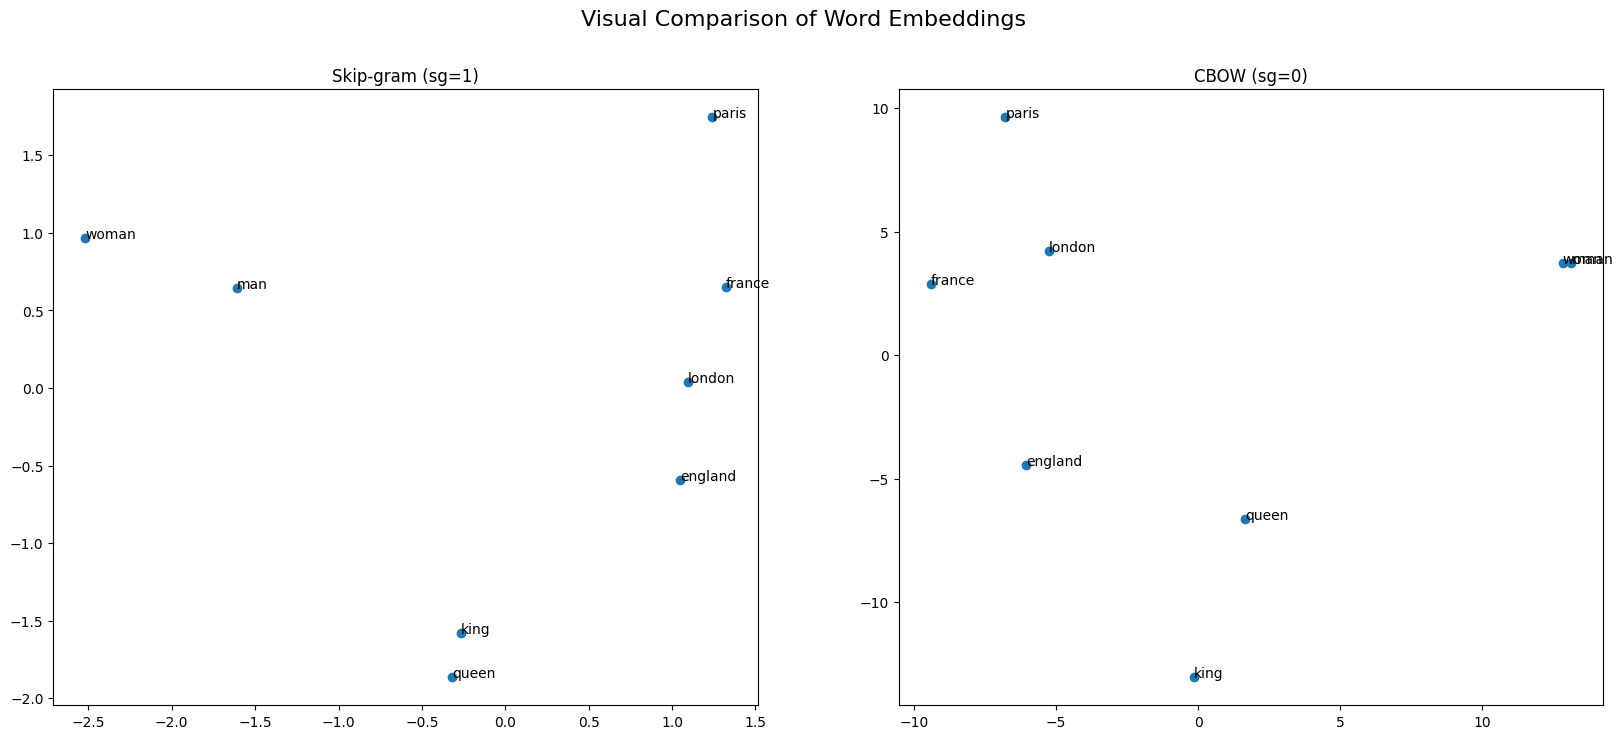

In [213]:
# --- Visual Comparison ---
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_embeddings_comparison(model_sg, model_cbow, words):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Visual Comparison of Word Embeddings', fontsize=16)

    # Words available in both models
    words_in_sg = [word for word in words if word in model_sg.wv]
    words_in_cbow = [word for word in words if word in model_cbow.wv]

    # --- Skip-gram Plot ---
    if words_in_sg:
        vectors_sg = [model_sg.wv[word] for word in words_in_sg]
        pca_sg = PCA(n_components=2)
        result_sg = pca_sg.fit_transform(vectors_sg)

        ax1.scatter(result_sg[:, 0], result_sg[:, 1])
        ax1.set_title('Skip-gram (sg=1)')
        for i, word in enumerate(words_in_sg):
            ax1.annotate(word, xy=(result_sg[i, 0], result_sg[i, 1]))
    else:
        ax1.set_title('Skip-gram (sg=1) - No words found')

    # --- CBOW Plot ---
    if words_in_cbow:
        vectors_cbow = [model_cbow.wv[word] for word in words_in_cbow]
        pca_cbow = PCA(n_components=2)
        result_cbow = pca_cbow.fit_transform(vectors_cbow)

        ax2.scatter(result_cbow[:, 0], result_cbow[:, 1])
        ax2.set_title('CBOW (sg=0)')
        for i, word in enumerate(words_in_cbow):
            ax2.annotate(word, xy=(result_cbow[i, 0], result_cbow[i, 1]))
    else:
        ax2.set_title('CBOW (sg=0) - No words found')

    plt.show()

# Words that might show interesting relationships
sample_words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'london', 'england']
visualize_embeddings_comparison(model, model_cbow, sample_words)

This cell displays the chunk tree as a diagram.

In [214]:
# --- Qualitative Comparison ---
# Let's compare the most similar words for a few terms

words_to_compare = ['king', 'woman', 'france']

for word in words_to_compare:
    print(f"--- Comparing similar words for '{word}' ---")

    # Skip-gram results
    if word in model.wv:
        similar_skipgram = model.wv.most_similar(word, topn=5)
        print(f"Skip-gram (sg=1): {[item[0] for item in similar_skipgram]}")
    else:
        print(f"Skip-gram (sg=1): Word not in vocabulary.")

    # CBOW results
    if word in model_cbow.wv:
        similar_cbow = model_cbow.wv.most_similar(word, topn=5)
        print(f"CBOW (sg=0): {[item[0] for item in similar_cbow]}")
    else:
        print(f"CBOW (sg=0): Word not in vocabulary.")
    print("\\n")

--- Comparing similar words for 'king' ---
Skip-gram (sg=1): ['canute', 'haakon', 'sweyn', 'valdemar', 'wenceslaus']
CBOW (sg=0): ['prince', 'throne', 'duke', 'emperor', 'queen']
\n
--- Comparing similar words for 'woman' ---
Skip-gram (sg=1): ['girl', 'man', 'promiscuous', 'children', 'prostitute']
CBOW (sg=0): ['child', 'girl', 'lady', 'mother', 'herself']
\n
--- Comparing similar words for 'france' ---
Skip-gram (sg=1): ['belgium', 'nantes', 'spain', 'toulouse', 'french']
CBOW (sg=0): ['spain', 'italy', 'portugal', 'belgium', 'austria']
\n


This cell performs chinking on the text.

### Chinking
Chinking is the process of removing a sequence of tokens from a chunk. If the chunk is the whole text, then chinking is the process of removing a sub-sequence of tokens from the text.

In [215]:
import pandas as pd

# Create a DataFrame to compare the evaluation scores
comparison_data = {
    "Metric": ["Word Similarity (Spearman Corr.)", "Analogy Accuracy"],
    "Skip-gram (sg=1)": [sim_score, analogy_score],
    "CBOW (sg=0)": [sim_score_cbow, analogy_score_cbow]
}
comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index("Metric", inplace=True)

print("--- Numerical Comparison ---")
print("Higher scores are better for both metrics.")
comparison_df

--- Numerical Comparison ---
Higher scores are better for both metrics.


,Skip-gram (sg=1),CBOW (sg=0)
Metric,,
Word Similarity (Spearman Corr.),NaN,NaN
Analogy Accuracy,0.125,0.0


from matplotlib import pyplot as plt
comparison_df['Skip-gram (sg=1)'].plot(kind='hist', bins=20, title='Skip-gram (sg=1)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['CBOW (sg=0)'].plot(kind='hist', bins=20, title='CBOW (sg=0)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='Skip-gram (sg=1)', y='CBOW (sg=0)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['Skip-gram (sg=1)'].plot(kind='line', figsize=(8, 4), title='Skip-gram (sg=1)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['CBOW (sg=0)'].plot(kind='line', figsize=(8, 4), title='CBOW (sg=0)')
plt.gca().spines[['top', 'right']].set_visible(False)